# Scaling et al

In [5]:
from sklearn import datasets

iris = datasets.load_iris()
wine = datasets.load_wine()

df = pd.DataFrame(
    wine.data,
    columns=wine.feature_names
)

df['target'] = pd.Series(
    wine.target
)

In [6]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.4, random_state=22)

x_train = df_train[wine.feature_names]
x_test  = df_test[wine.feature_names]

y_train = df_train['target']
y_test  = df_test['target']

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Feature Selection

## Mutual Information

In [10]:
df_mi = pd.DataFrame(
    {
        'x1': [0, 1, 1, 1, 0],
        'x2': [1, 0, 1, 0, 0],
        'y': [0, 1, 0, 1, 1],
    }
)

df_mi

,x1,x2,y
0,0,1,0
1,1,0,1
2,1,1,0
3,1,0,1
4,0,0,1


In [11]:
from sklearn.feature_selection import mutual_info_classif

mutual_info_classif(df_mi[['x1', 'x2']], df_mi['y'], n_neighbors=2)

array([0.        , 0.78333333])

In [12]:
from sklearn.metrics import mutual_info_score

mutual_info_score(df_mi['x1'], df_mi['y'])

0.013844293808390418

In [13]:
import math 

p_xy = lambda x, y, xcol: df_mi[(df_mi[xcol] == x) & (df_mi['y'] == y)].shape[0] / df_mi.shape[0]
p_x = lambda x, xcol: df_mi[(df_mi[xcol] == x)].shape[0] / df_mi.shape[0]
p_y = lambda y: df_mi[(df_mi['y'] == y)].shape[0] / df_mi.shape[0]

def pmi(x, y, xcol='x1'):
    _pxy = p_xy(x, y, xcol)
    _px = p_x(x, xcol)
    _py = p_y(y)
    if _pxy == 0:
        return 0
    else:
        return _pxy * math.log(_pxy / (_px * _py))

mi = []
for i in [0, 1]:
    for j in [0, 1]:
        mi.append(pmi(i, j, 'x1'))

print(sum(mi))

0.013844293808390619


## Load Data

In [14]:
iris = datasets.load_iris()
wine = datasets.load_wine()

df = pd.DataFrame(
    wine.data,
    columns=wine.feature_names
)

df['target'] = pd.Series(
    wine.target
)

In [15]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.4, random_state=22)

x_train = df_train[wine.feature_names]
x_test  = df_test[wine.feature_names]

y_train = df_train['target']
y_test  = df_test['target']

## Variance Threshold

In [16]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=0)
vt.fit(x_train)

VarianceThreshold(threshold=0)

In [17]:
pd.DataFrame(
    {
        'Feature': wine.feature_names,
        'Variance': vt.variances_,
    }
).sort_values(
    'Variance', ascending=True
)

,Feature,Variance
7,nonflavanoid_phenols,0.013845
10,hue,0.055709
2,ash,0.068327
8,proanthocyanins,0.306081
5,total_phenols,0.369353
11,od280/od315_of_diluted_wines,0.478116
0,alcohol,0.679757
6,flavanoids,0.925865
1,malic_acid,0.987016
9,color_intensity,5.612742


In [18]:
vt = VarianceThreshold(threshold=5)
vt.fit(x_train)
# x_train_new, x_test_new = vt.transform(x_train), vt.transform(x_test)

VarianceThreshold(threshold=5)

In [19]:
# x_train_new = x_train.iloc[:, vt.get_support()]
x_train.iloc[:, vt.get_support()]

,alcalinity_of_ash,magnesium,color_intensity,proline
131,20.0,104.0,5.40,530.0
16,20.0,120.0,6.20,1280.0
106,19.0,80.0,3.40,510.0
64,19.0,104.0,2.95,355.0
68,17.0,110.0,3.17,750.0
...,...,...,...,...
102,21.0,98.0,2.80,438.0
100,17.5,97.0,3.30,710.0
44,17.0,107.0,5.04,885.0
132,24.0,98.0,5.70,560.0


In [20]:
units = np.arange(10)
tens = 10 * units
hundreds = 100 * units

print(
    'VAR(units): {}, VAR(tens): {}, VAR(hundreds): {}'.format(
        units.var(), tens.var(), hundreds.var()
    )
)

VAR(units): 8.25, VAR(tens): 825.0, VAR(hundreds): 82500.0


In [21]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

vt = VarianceThreshold(threshold=0)
vt.fit(x_train_scaled)

VarianceThreshold(threshold=0)

In [22]:
pd.DataFrame(
    {
        'Feature': wine.feature_names,
        'Variance': vt.variances_,
    }
).sort_values(
    'Variance', ascending=True
)

,Feature,Variance
4,magnesium,0.027419
2,ash,0.029189
3,alcalinity_of_ash,0.032743
10,hue,0.036823
8,proanthocyanins,0.037160
6,flavanoids,0.041209
5,total_phenols,0.043918
9,color_intensity,0.044269
0,alcohol,0.047075
1,malic_acid,0.049843


In [23]:
# Coefficient of variation

df_variances = x_train.apply([np.mean, np.var, np.std]).T
df_variances['cv'] = df_variances['std'] / df_variances['mean']

df_variances.sort_values('cv', ascending=True)[
    ['var', 'cv']
]

,var,cv
alcohol,0.686231,0.063844
ash,0.068978,0.111398
magnesium,234.287960,0.153195
alcalinity_of_ash,8.999049,0.154009
hue,0.056240,0.242091
od280/od315_of_diluted_wines,0.482670,0.264152
total_phenols,0.372870,0.267334
nonflavanoid_phenols,0.013977,0.327457
proanthocyanins,0.308996,0.351651
proline,106662.478347,0.440263


## Filters

In [24]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

f, p = f_classif(x_train_scaled, y_train)

In [25]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(x_train, y_train)

In [26]:
pd.DataFrame(
    {
        'Feature': wine.feature_names,
        'F': f,
        'MI': mi,
    }
).sort_values(
    'MI', ascending=False
).style.bar(
    subset=['F', 'MI'], color='grey'
)

,Feature,F,MI
6,flavanoids,119.566,0.682623
9,color_intensity,74.0814,0.625665
12,proline,133.289,0.532535
11,od280/od315_of_diluted_wines,90.6593,0.498819
0,alcohol,82.6288,0.454655
10,hue,66.7377,0.426239
5,total_phenols,54.6519,0.36232
1,malic_acid,23.0863,0.352976
3,alcalinity_of_ash,25.8039,0.288957
4,magnesium,7.65196,0.26746


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


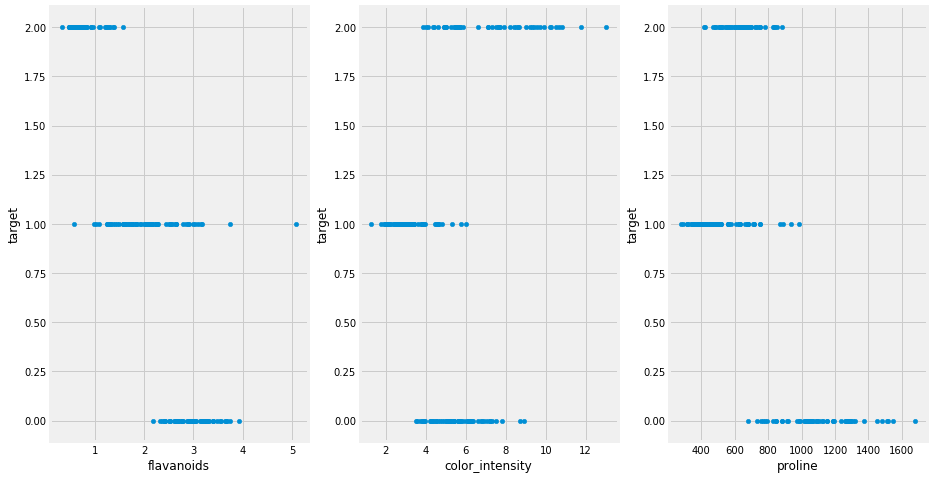

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(14, 8));

df.plot(
    kind='scatter',
    x='flavanoids',
    y='target',
    ax=axs[0]
)

df.plot(
    kind='scatter',
    x='color_intensity',
    y='target',
    ax=axs[1]
)

df.plot(
    kind='scatter',
    x='proline',
    y='target',
    ax=axs[2]
)

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


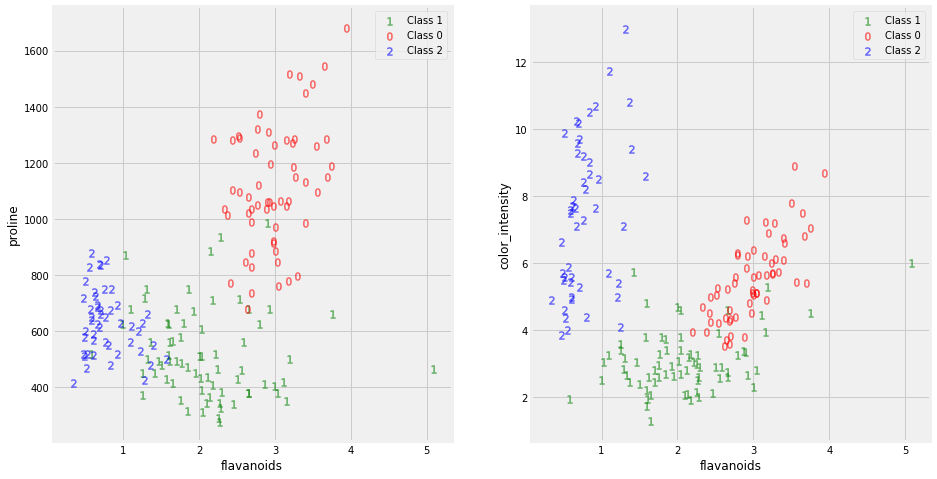

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8));

for c in df['target'].value_counts().index.tolist():
    
    df[
        df['target'] == c
    ].plot(
        kind='scatter',
        x='flavanoids',
        y='proline',
        color=['r', 'g', 'b'][c],
        marker=f'${c}$',
        s=64,
        alpha='0.5',
        label=f'Class {c}',
        ax=axs[0],
    )

for c in df['target'].value_counts().index.tolist():
    
    df[
        df['target'] == c
    ].plot(
        kind='scatter',
        x='flavanoids',
        y='color_intensity',
        color=['r', 'g', 'b'][c],
        marker=f'${c}$',
        s=64,
        alpha='0.5',
        label=f'Class {c}',
        ax=axs[1],
    )

fig.show()

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=8)
selector.fit(x_train, y_train)

x_train.iloc[:, selector.get_support()]

,alcohol,malic_acid,total_phenols,flavanoids,color_intensity,hue,od280/od315_of_diluted_wines,proline
131,12.88,2.99,1.30,1.22,5.40,0.74,1.42,530.0
16,14.30,1.92,2.80,3.14,6.20,1.07,2.65,1280.0
106,12.25,1.73,1.65,2.03,3.40,1.00,3.17,510.0
64,12.17,1.45,1.89,1.75,2.95,1.45,2.23,355.0
68,13.34,0.94,2.53,1.30,3.17,1.02,1.93,750.0
...,...,...,...,...,...,...,...,...
102,12.34,2.45,2.56,2.11,2.80,0.80,3.38,438.0
100,12.08,2.08,2.23,2.17,3.30,1.27,2.96,710.0
44,13.05,1.77,3.00,3.00,5.04,0.88,3.35,885.0
132,12.81,2.31,1.15,1.09,5.70,0.66,1.36,560.0


In [30]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

topn = 5

# mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=2)
selector.fit(x_train, y_train)

x_train_topn = x_train.iloc[:, selector.get_support()]
x_test_topn = x_test.iloc[:, selector.get_support()]

scaler = StandardScaler()
x_train_topn_scaled = scaler.fit_transform(x_train_topn)
x_test_topn_scaled = scaler.transform(x_test_topn)

model = LogisticRegression()
model.fit(x_train_topn_scaled, y_train)
y_pred = model.predict(x_test_topn_scaled)

lr_mi_accuracy = accuracy_score(y_test, y_pred)
print(
    f'Logistic Regression (MI top {topn}) Accuracy: {lr_mi_accuracy:.2f}'
)

# f_classif

selector = SelectKBest(score_func=f_classif, k=topn)
selector.fit(x_train, y_train)

x_train_topn = x_train.iloc[:, selector.get_support()]
x_test_topn = x_test.iloc[:, selector.get_support()]

scaler = StandardScaler()
x_train_topn_scaled = scaler.fit_transform(x_train_topn)
x_test_topn_scaled = scaler.transform(x_test_topn)

model = LogisticRegression()
model.fit(x_train_topn_scaled, y_train)
y_pred = model.predict(x_test_topn_scaled)

lr_f_accuracy = accuracy_score(y_test, y_pred)
print(
    f'Logistic Regression (F top {topn}) Accuracy: {lr_f_accuracy:.2f}'
)



Logistic Regression (MI top 5) Accuracy: 0.90
Logistic Regression (F top 5) Accuracy: 0.97


In [31]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

topn = 4

# mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=2)
selector.fit(x_train, y_train)

x_train_topn = x_train.iloc[:, selector.get_support()]
x_test_topn = x_test.iloc[:, selector.get_support()]

scaler = StandardScaler()
x_train_topn_scaled = scaler.fit_transform(x_train_topn)
x_test_topn_scaled = scaler.transform(x_test_topn)

model = DecisionTreeClassifier()
model.fit(x_train_topn_scaled, y_train)
y_pred = model.predict(x_test_topn_scaled)

dt_mi_accuracy = accuracy_score(y_test, y_pred)
print(
    f'Decision Tree Classifier (MI top {topn}) Accuracy: {dt_mi_accuracy:.2f}'
)

# f_classif

selector = SelectKBest(score_func=f_classif, k=topn)
selector.fit(x_train, y_train)

x_train_topn = x_train.iloc[:, selector.get_support()]
x_test_topn = x_test.iloc[:, selector.get_support()]

scaler = StandardScaler()
x_train_topn_scaled = scaler.fit_transform(x_train_topn)
x_test_topn_scaled = scaler.transform(x_test_topn)

model = DecisionTreeClassifier()
model.fit(x_train_topn_scaled, y_train)
y_pred = model.predict(x_test_topn_scaled)

dt_f_accuracy = accuracy_score(y_test, y_pred)
print(
    f'Decision Tree Classifier (F top {topn}) Accuracy: {dt_f_accuracy:.2f}'
)



Decision Tree Classifier (MI top 4) Accuracy: 0.93
Decision Tree Classifier (F top 4) Accuracy: 0.89


In [32]:
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

pd.DataFrame(
    {
        'Logistic Regression': [lr_f_accuracy, lr_mi_accuracy],
        'Decision Tree Classifier': [dt_f_accuracy, dt_mi_accuracy], 
    },
    index=['SelectKBest(f_classif)', 'SelectKBest(mutual_info_classif)'],
).round(2).style.apply(highlight_max)

,Logistic Regression,Decision Tree Classifier
SelectKBest(f_classif),0.97,0.89
SelectKBest(mutual_info_classif),0.9,0.93


In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

selector = SelectKBest(score_func=mutual_info_classif, k=3)
selector.fit(x_train, y_train)

x_train_topn = x_train.iloc[:, selector.get_support()]
x_test_topn = x_test.iloc[:, selector.get_support()]

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

model = LogisticRegression()
model.fit(x_train_topn, y_train)
y_pred = model.predict(x_test_topn)

print(
    'Logistic Regression Accuracy',
    accuracy_score(y_test, y_pred)
)

model = DecisionTreeClassifier()
model.fit(x_train_topn, y_train)
y_pred = model.predict(x_test_topn)

print(
    'Decision Tree Classifier Accuracy',
    accuracy_score(y_test, y_pred)
)

Logistic Regression Accuracy 0.9444444444444444
Decision Tree Classifier Accuracy 0.8611111111111112


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [34]:
# from sklearn.feature_selection import SelectKBest
# feature_selection.SelectPercentile

## Embedded 

In [35]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier()
selector = SelectFromModel(estimator=estimator, threshold=-np.inf, max_features=8)
selector.fit(x_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 presort='deprecated',
                                                 random_state=None,
                                                 splitter='best'),
                max_feat

In [36]:
x_train.iloc[:, selector.get_support()]

,alcohol,ash,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,proline
131,12.88,2.40,1.30,1.22,0.83,5.40,0.74,530.0
16,14.30,2.72,2.80,3.14,1.97,6.20,1.07,1280.0
106,12.25,2.12,1.65,2.03,1.63,3.40,1.00,510.0
64,12.17,2.53,1.89,1.75,1.03,2.95,1.45,355.0
68,13.34,2.36,2.53,1.30,0.42,3.17,1.02,750.0
...,...,...,...,...,...,...,...,...
102,12.34,2.46,2.56,2.11,1.31,2.80,0.80,438.0
100,12.08,1.70,2.23,2.17,1.40,3.30,1.27,710.0
44,13.05,2.10,3.00,3.00,2.03,5.04,0.88,885.0
132,12.81,2.40,1.15,1.09,0.83,5.70,0.66,560.0


# PCA & LDA

In [37]:
n = 500

df_rand = pd.DataFrame(
    {
        'x1': np.random.normal(loc=0, scale=.1, size=n),
        'x2': np.random.normal(loc=0, scale=.1, size=n),
    }
)

df_rand['y'] = df_rand['x1'] - df_rand['x2']

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


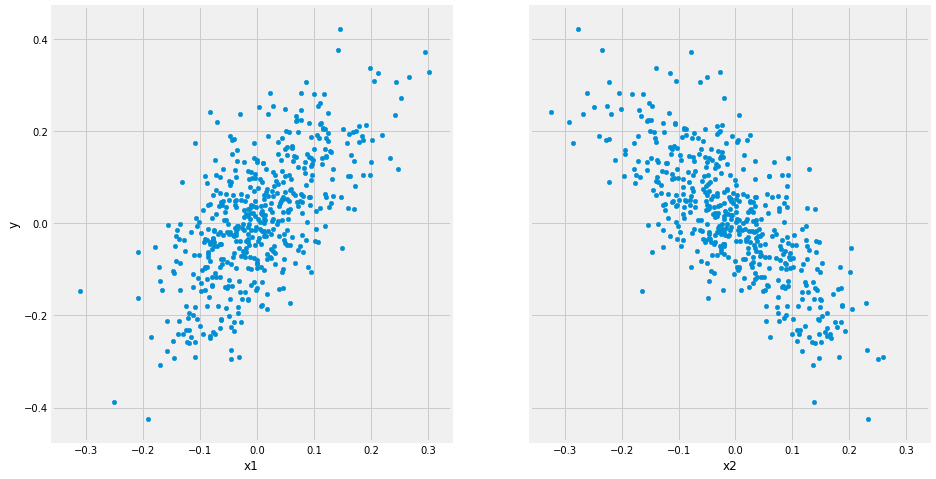

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8), sharex=True, sharey=True);

for i in range(2):
    
    df_rand.plot(
        kind='scatter',
        x=f'x{i+1}',
        y='y',
        ax=axs[i]
    )

fig.show()

In [39]:
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

n_components = 1

pca = PCA(n_components=n_components)

if n_components == 2:
    df_rand['Component 1'] = pca.fit_transform(df_rand[['x1', 'x2']])[:,0]
    df_rand['Component 2'] = pca.fit_transform(df_rand[['x1', 'x2']])[:,1]
else:
    df_rand['Principal Component'] = pca.fit_transform(df_rand[['x1', 'x2']])

In [40]:
pca.components_, pca.explained_variance_

(array([[-0.05722933, -0.99836106]]), array([0.01058689]))

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


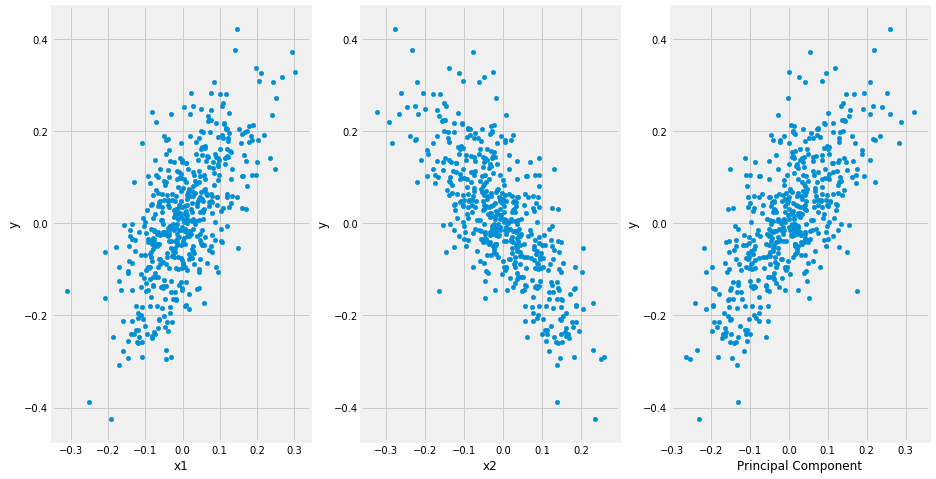

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(14, 8));
    
df_rand.plot(
    kind='scatter',
    x='x1',
    y='y',
    ax=axs[0]
)

df_rand.plot(
    kind='scatter',
    x='x2',
    y='y',
    ax=axs[1]
)

df_rand.plot(
    kind='scatter',
    x='Principal Component',
    y='y',
    ax=axs[2]
)

fig.show()

In [42]:
import pandas as pd
from sklearn import datasets

In [43]:
iris = datasets.load_iris()
wine = datasets.load_wine()

df = pd.DataFrame(
    iris.data,
    columns=iris.feature_names
)

df['target'] = pd.Series(
    iris.target
)

In [44]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [45]:
x, y = df[iris.feature_names], df['target']

In [46]:
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
model = LogisticRegression()
model.fit(scaler.fit_transform(x), y)

pd.DataFrame(
    {
        'Features': x.columns,
        'ABS(Coeff)': np.abs(model.coef_[0]),
    }
).sort_values('ABS(Coeff)', ascending=False)

,Features,ABS(Coeff)
2,petal length (cm),1.930629
3,petal width (cm),1.811689
1,sepal width (cm),1.160063
0,sepal length (cm),1.074041


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

n_components = 2

scaler = StandardScaler()
pca = PCA(n_components=n_components)
# pca = KernelPCA(n_components=n_components, kernel='cosine')

x_scaled = scaler.fit_transform(x)
x_pca = pca.fit_transform(x_scaled)

df_pca = pd.DataFrame(
    x_pca,
    columns=[f'Component {n}' for n in range(1, n_components+1)]
)
df_pca['target'] = df['target']

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


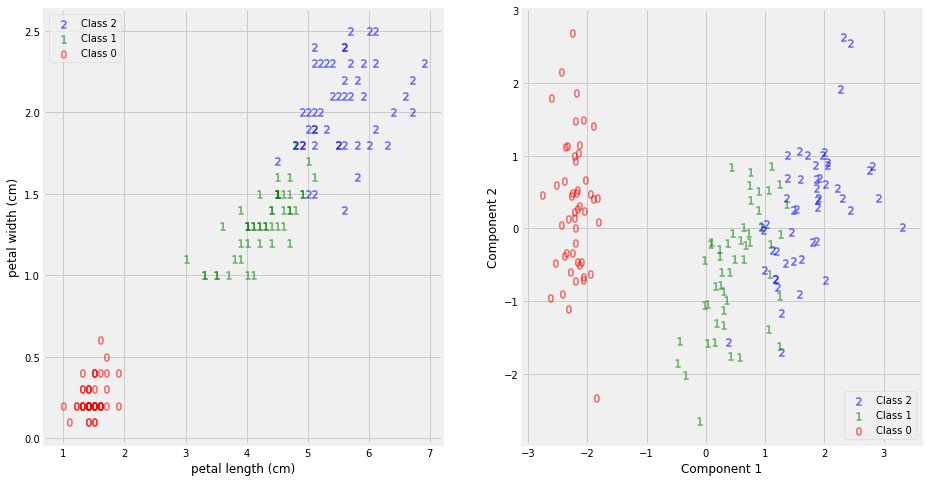

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8));

for c in df['target'].value_counts().index.tolist():
    df[
        df['target'] == c
    ].plot(
        kind='scatter',
        x='petal length (cm)',
        y='petal width (cm)',
        color=['r', 'g', 'b'][c],
        marker=f'${c}$',
        s=64,
        alpha='0.5',
        label=f'Class {c}',
        ax=axs[0],
    )
    
for c in df_pca['target'].value_counts().index.tolist():
    df_pca[
        df_pca['target'] == c
    ].plot(
        kind='scatter',
        x='Component 1',
        y='Component 2',
        color=['r', 'g', 'b'][c],
        marker=f'${c}$',
        s=64,
        alpha='0.5',
        label=f'Class {c}',
        ax=axs[1],
    )
    
fig.show()

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

n_components = 2

scaler = StandardScaler()
lda = LinearDiscriminantAnalysis(n_components=n_components)

x_scaled = scaler.fit_transform(x)
x_lda = lda.fit_transform(x_scaled, y)

df_lda = pd.DataFrame(
    x_lda,
    columns=[f'Component {n}' for n in range(1, n_components+1)]
)
df_lda['target'] = df['target']

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:33: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


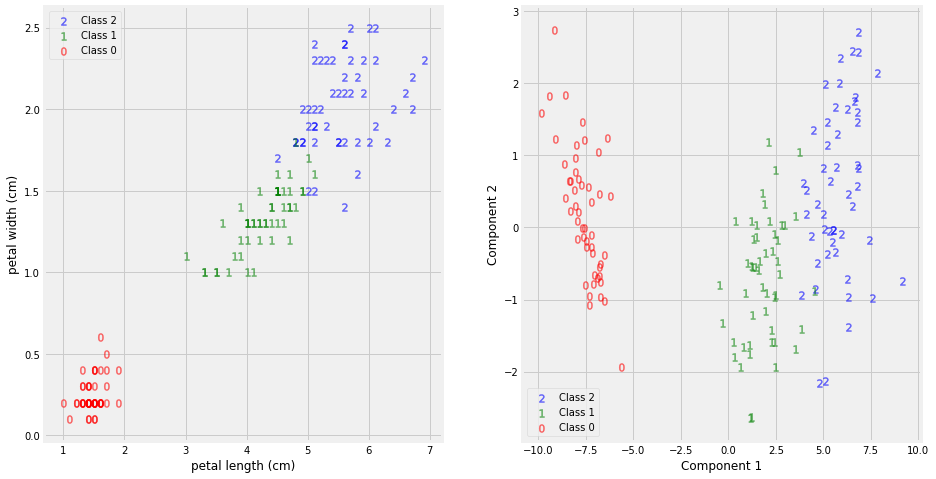

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(14, 8));

for c in df['target'].value_counts().index.tolist():
    df[
        df['target'] == c
    ].plot(
        kind='scatter',
        x='petal length (cm)',
        y='petal width (cm)',
        color=['r', 'g', 'b'][c],
        marker=f'${c}$',
        s=64,
        alpha='0.5',
        label=f'Class {c}',
        ax=axs[0],
    )
    
for c in df_pca['target'].value_counts().index.tolist():
    df_lda[
        df_lda['target'] == c
    ].plot(
        kind='scatter',
        x='Component 1',
        y='Component 2',
        color=['r', 'g', 'b'][c],
        marker=f'${c}$',
        s=64,
        alpha='0.5',
        label=f'Class {c}',
        ax=axs[1],
    )
    
fig.show()

In [51]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.4, random_state=22)

x_train = df_train[iris.feature_names]
x_test  = df_test[iris.feature_names]

y_train = df_train['target']
y_test  = df_test['target']

In [52]:
x_train.shape, x_test.shape, y_train.shape

((90, 4), (60, 4), (90,))

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier() # LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

accuracy_score(y_test, y_pred)

0.9333333333333333

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

n_components = 2

scaler = StandardScaler()
pca = PCA(n_components=n_components)
# pca = KernelPCA(n_components=n_components, kernel='cosine')

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

model = DecisionTreeClassifier() # LogisticRegression()
model.fit(x_train_pca, y_train)
y_pred = model.predict(x_test_pca)

accuracy_score(y_test, y_pred)

0.8333333333333334

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

n_components = 2

scaler = StandardScaler()
lda = LinearDiscriminantAnalysis(n_components=n_components)

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_lda = lda.fit_transform(x_train_scaled, y_train)
x_test_lda = lda.transform(x_test_scaled)

model = DecisionTreeClassifier() # LogisticRegression()
model.fit(x_train_lda, y_train)
y_pred = model.predict(x_test_lda)

accuracy_score(y_test, y_pred)

0.9833333333333333